# Tarea 4. Procesamiento de imágenes


**Pasos del código:**
1. Cargar la imagen localmente.
2. Convertir la imagen a escala de grises.
3. Aplicar desenfoque para reducir ruido.
4. Detectar círculos usando cv2.HoughCircles.
5. Dibujar los círculos y sus centros en la imagen.
6. Mostrar la imagen procesada con matplotlib.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 1. Cargar la imagen localmente

In [4]:

image_path = "imagen_burbujas.jpg"  
img = cv2.imread(image_path)


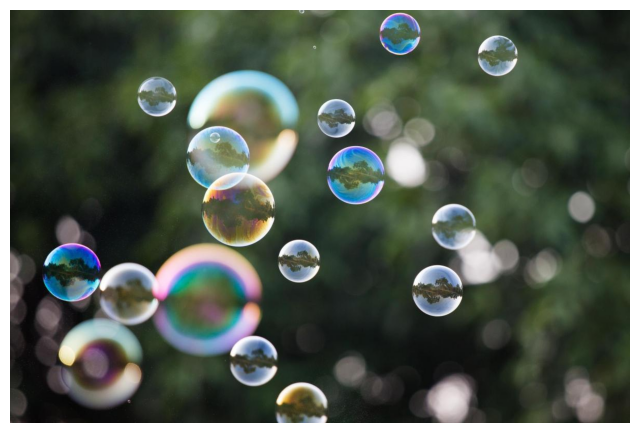

In [5]:
# Convertir de BGR a RGB para mostrar correctamente con Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize = (8, 6))  # Ajustar el tamaño de la figura
plt.imshow(img_rgb)           # Mostrar en formato RGB
plt.axis('off')               # Ocultar ejes
plt.show()

## 2. Escala de grises

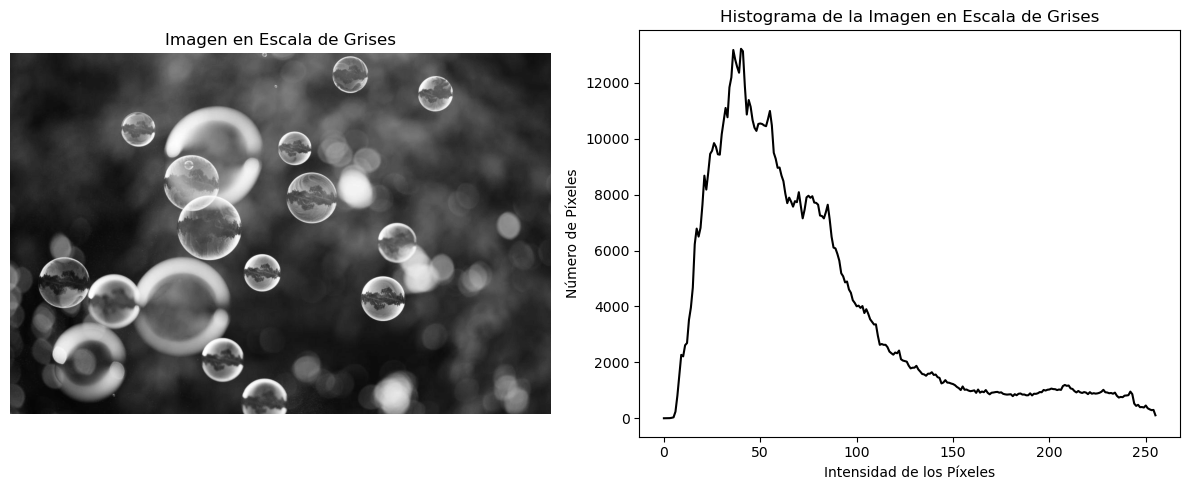

In [7]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Oscurecer la imagen dividiéndola por un valor alto (ajustable)
dark_image = (gray / 2).astype(np.uint8)
 
# Calcular el histograma para la imagen en escala de grises
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Visualizar la imagen en escala de grises y su histograma
plt.figure(figsize = (12, 5))

plt.subplot(121)
plt.imshow(dark_image, cmap = 'gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(122)
plt.plot(hist_gray, color = 'black')
plt.title('Histograma de la Imagen en Escala de Grises')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.tight_layout()
plt.show()

## 3. Ruido

(array([119.,  36.,  13.,  12.,   7.,  23.,  11.,  17.,  11.,   7.]),
 array([    0.        ,  1321.80004883,  2643.60009766,  3965.39990234,
         5287.20019531,  6609.        ,  7930.79980469,  9252.59960938,
        10574.40039062, 11896.20019531, 13218.        ]),
 <BarContainer object of 10 artists>)

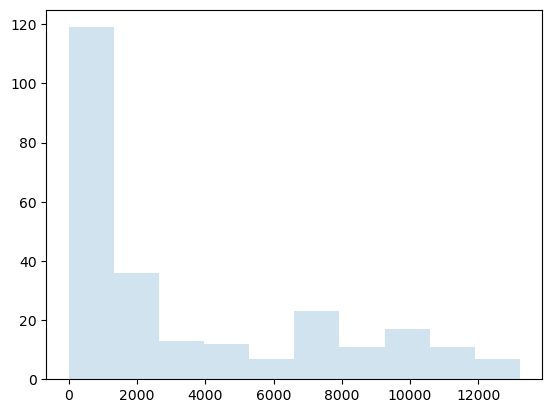

In [9]:
# Aplicar desenfoque Gaussiano
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)
hist_blurred = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.show()
plt.hist(hist_blurred, alpha = 0.2)

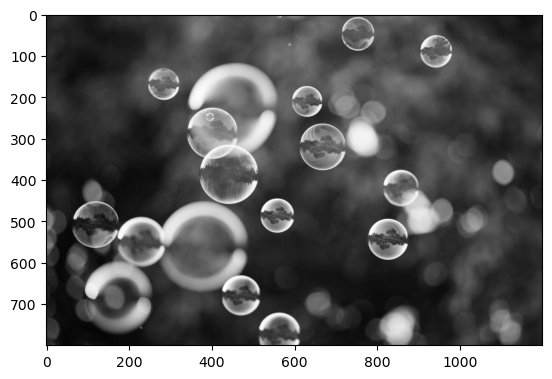

In [10]:
# Mostrar la imagen usando matplotlib
plt.imshow(gray, cmap = 'gray')
plt.show()

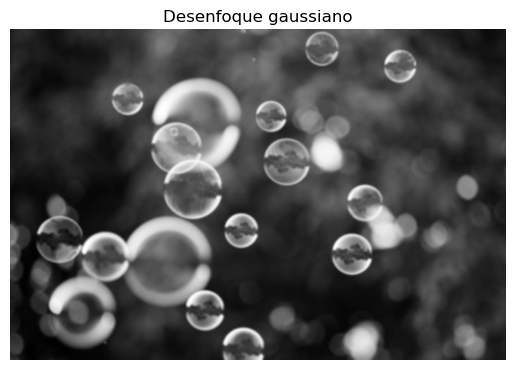

In [11]:
plt.imshow(gray_blurred, cmap = 'gray')
plt.title('Desenfoque gaussiano')
plt.axis('off')
plt.show()

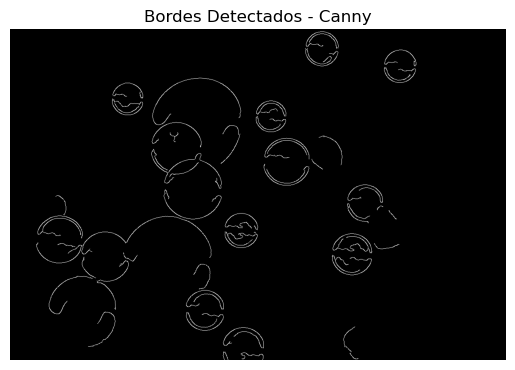

In [12]:
# Detectar bordes usando el detector de Canny
edges = cv2.Canny(gray_blurred, 30, 150)

plt.imshow(edges, cmap = 'gray')
plt.title('Bordes Detectados - Canny')
plt.axis('off')
plt.show()

## 4. Detectar círculos

In [14]:
# Detectar círculos en la imagen con la Transformada de Hough

circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp = 1.2, minDist = 30,
                           param1 = 50, param2 = 30, minRadius = 10, maxRadius = 100)


In [15]:
# 5. Dibujar los círculos detectados

output = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        
        # Dibujar el contorno del círculo (verde)
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
        # Dibujar el centro del círculo (rojo)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)
        

In [16]:
# 6. Convertir la imagen a RGB para mostrar con Matplotlib

output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)


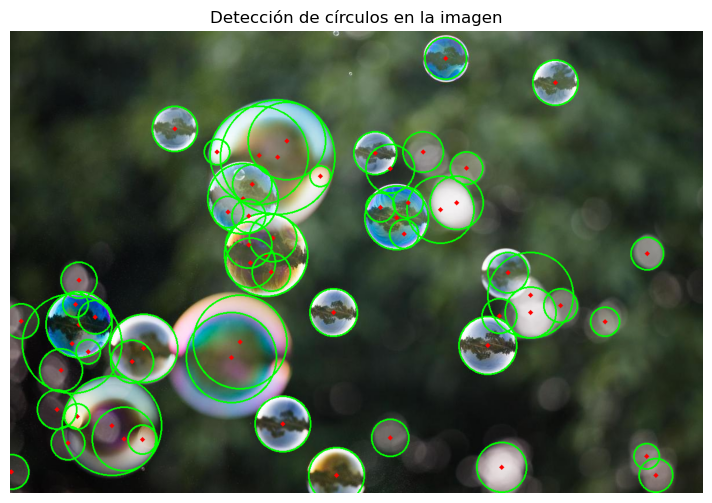

In [17]:
# Mostrar la imagen con los círculos detectados

plt.figure(figsize = (10, 6))
plt.imshow(output_rgb)
plt.axis("off")
plt.title("Detección de círculos en la imagen")
plt.show()


## Guardar imágenes

In [19]:
# Crear carpeta para guardar imágenes si no existe

output_folder = "imagenes"
os.makedirs(output_folder, exist_ok = True)


In [20]:
original_path = os.path.join(output_folder, "imagen_original.jpg")
cv2.imwrite(original_path, img)

True

In [21]:
grayscale_path = os.path.join(output_folder, "imagen_grises.jpg")
cv2.imwrite(grayscale_path, gray)

True

In [22]:
blurred_path = os.path.join(output_folder, "imagen_gauss.jpg")
cv2.imwrite(blurred_path, gray_blurred)

True

In [23]:
detected_circles_path = os.path.join(output_folder, "imagen_circulos.jpg")
cv2.imwrite(detected_circles_path, output)

True

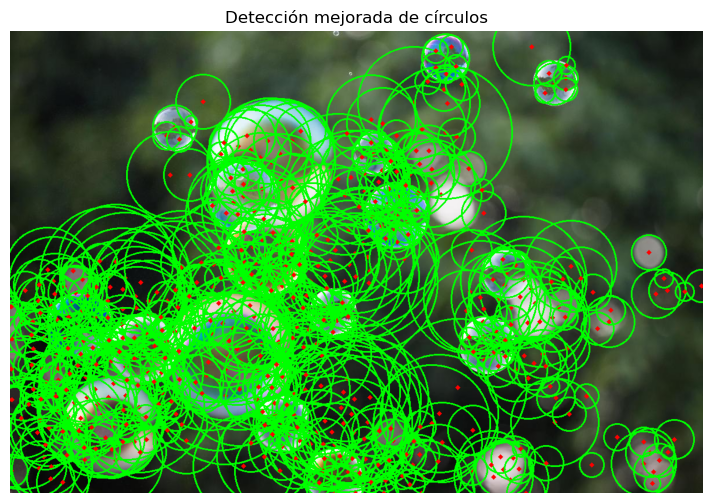

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 📌 1. Cargar la imagen localmente
image_path = "imagen_burbujas.jpg"  
img = cv2.imread(image_path)

if img is None:
    print("Error: No se pudo cargar la imagen.")
else:
    # 📌 2. Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 📌 3. Aplicar ecualización de histograma para mejorar contraste
    gray_eq = cv2.equalizeHist(gray)

    # 📌 4. Aplicar filtro de Canny para detección de bordes
    edges = cv2.Canny(gray_eq, 50, 150)

    # 📌 5. Aplicar desenfoque gaussiano
    blurred = cv2.GaussianBlur(edges, (9, 9), 2)

    # 📌 6. Detectar círculos con la Transformada de Hough
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
        param1=40, param2=25, minRadius=5, maxRadius=120
    )

    # 📌 7. Dibujar los círculos detectados
    output = img.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Contorno
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)  # Centro

    # 📌 8. Convertir a RGB y mostrar
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(output_rgb)
    plt.axis("off")
    plt.title("Detección mejorada de círculos")
    plt.show()
